In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Choose the graph you want to plot (1-2)
# 1: com-youtube
# 2: soc-LiveJournal1

graph = 2

# com-youtube
if graph == 1:
    file = 'data/random/thread/com-youtube.ungraph_randomwalk_thread_nvm0'
    file2 = 'data/random/thread/com-youtube.ungraph_randomwalk_thread_nvm1'
    file3 = 'data/random/thread/com-youtube.ungraph_randomwalk_thread_ssd'
    output_path = 'plot/random/rw_com-youtube'
# soc-LiveJournal1
elif graph == 2:
    file = 'data/random/thread/soc-LiveJournal1_randomwalk_thread_nvm0'
    file2 = 'data/random/thread/soc-LiveJournal1_randomwalk_thread_nvm1'
    file3 = 'data/random/thread/soc-LiveJournal1_randomwalk_thread_ssd'
    output_path = 'plot/random/rw_soc-LiveJournal1'


In [9]:
# Load NVM0
df = pd.read_csv( file + '.csv')


# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()
# df = df.drop(['key'], axis=1).groupby(['name', 'type', 'thread']).sum().reset_index()
index = df[ (df['thread'] > 128) ].index
df.drop(index , inplace=True)


# df to array
nvm0 = df['time'].to_numpy()

thread = pd.unique(df['thread'])

x = list(range(len(thread)))

# Line 1
y1 = nvm0
y1_name = "CAVE-RW (PCIe)"

df

,algo_name,thread,time
0,randomwalk,1,259.325048
1,randomwalk,2,188.412515
2,randomwalk,4,114.746137
3,randomwalk,8,62.358298
4,randomwalk,16,29.348756
5,randomwalk,32,28.640333
6,randomwalk,64,42.342044
7,randomwalk,128,73.914244


In [10]:
# Load NVM1
df = pd.read_csv( file2 + '.csv')

# This is for # thread


# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()
index = df[ (df['thread'] > 128) ].index
df.drop(index , inplace=True)

# df to array
nvm1 = df['time'].to_numpy()

# Line 2
y2 = nvm1
y2_name = "CAVE-RW (Optane)"

df

,algo_name,thread,time
0,randomwalk,1,39.284380
1,randomwalk,2,23.113778
2,randomwalk,4,13.859776
3,randomwalk,8,8.692936
4,randomwalk,16,7.036627
5,randomwalk,32,7.520698
6,randomwalk,64,10.743771
7,randomwalk,128,17.384891


In [11]:
# Load SSD
df = pd.read_csv( file3 + '.csv')

# This is for # thread


# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()
index = df[ (df['thread'] > 128) ].index
df.drop(index , inplace=True)

# df to array
ssd = df['time'].to_numpy()

# Line 2
y3 = ssd
y3_name = "CAVE-RW (SATA)"

df

,algo_name,thread,time
0,randomwalk,1,390.463109
1,randomwalk,2,201.364881
2,randomwalk,4,117.284501
3,randomwalk,8,81.026902
4,randomwalk,16,62.888293
5,randomwalk,32,64.090539
6,randomwalk,64,83.925833
7,randomwalk,128,126.939926


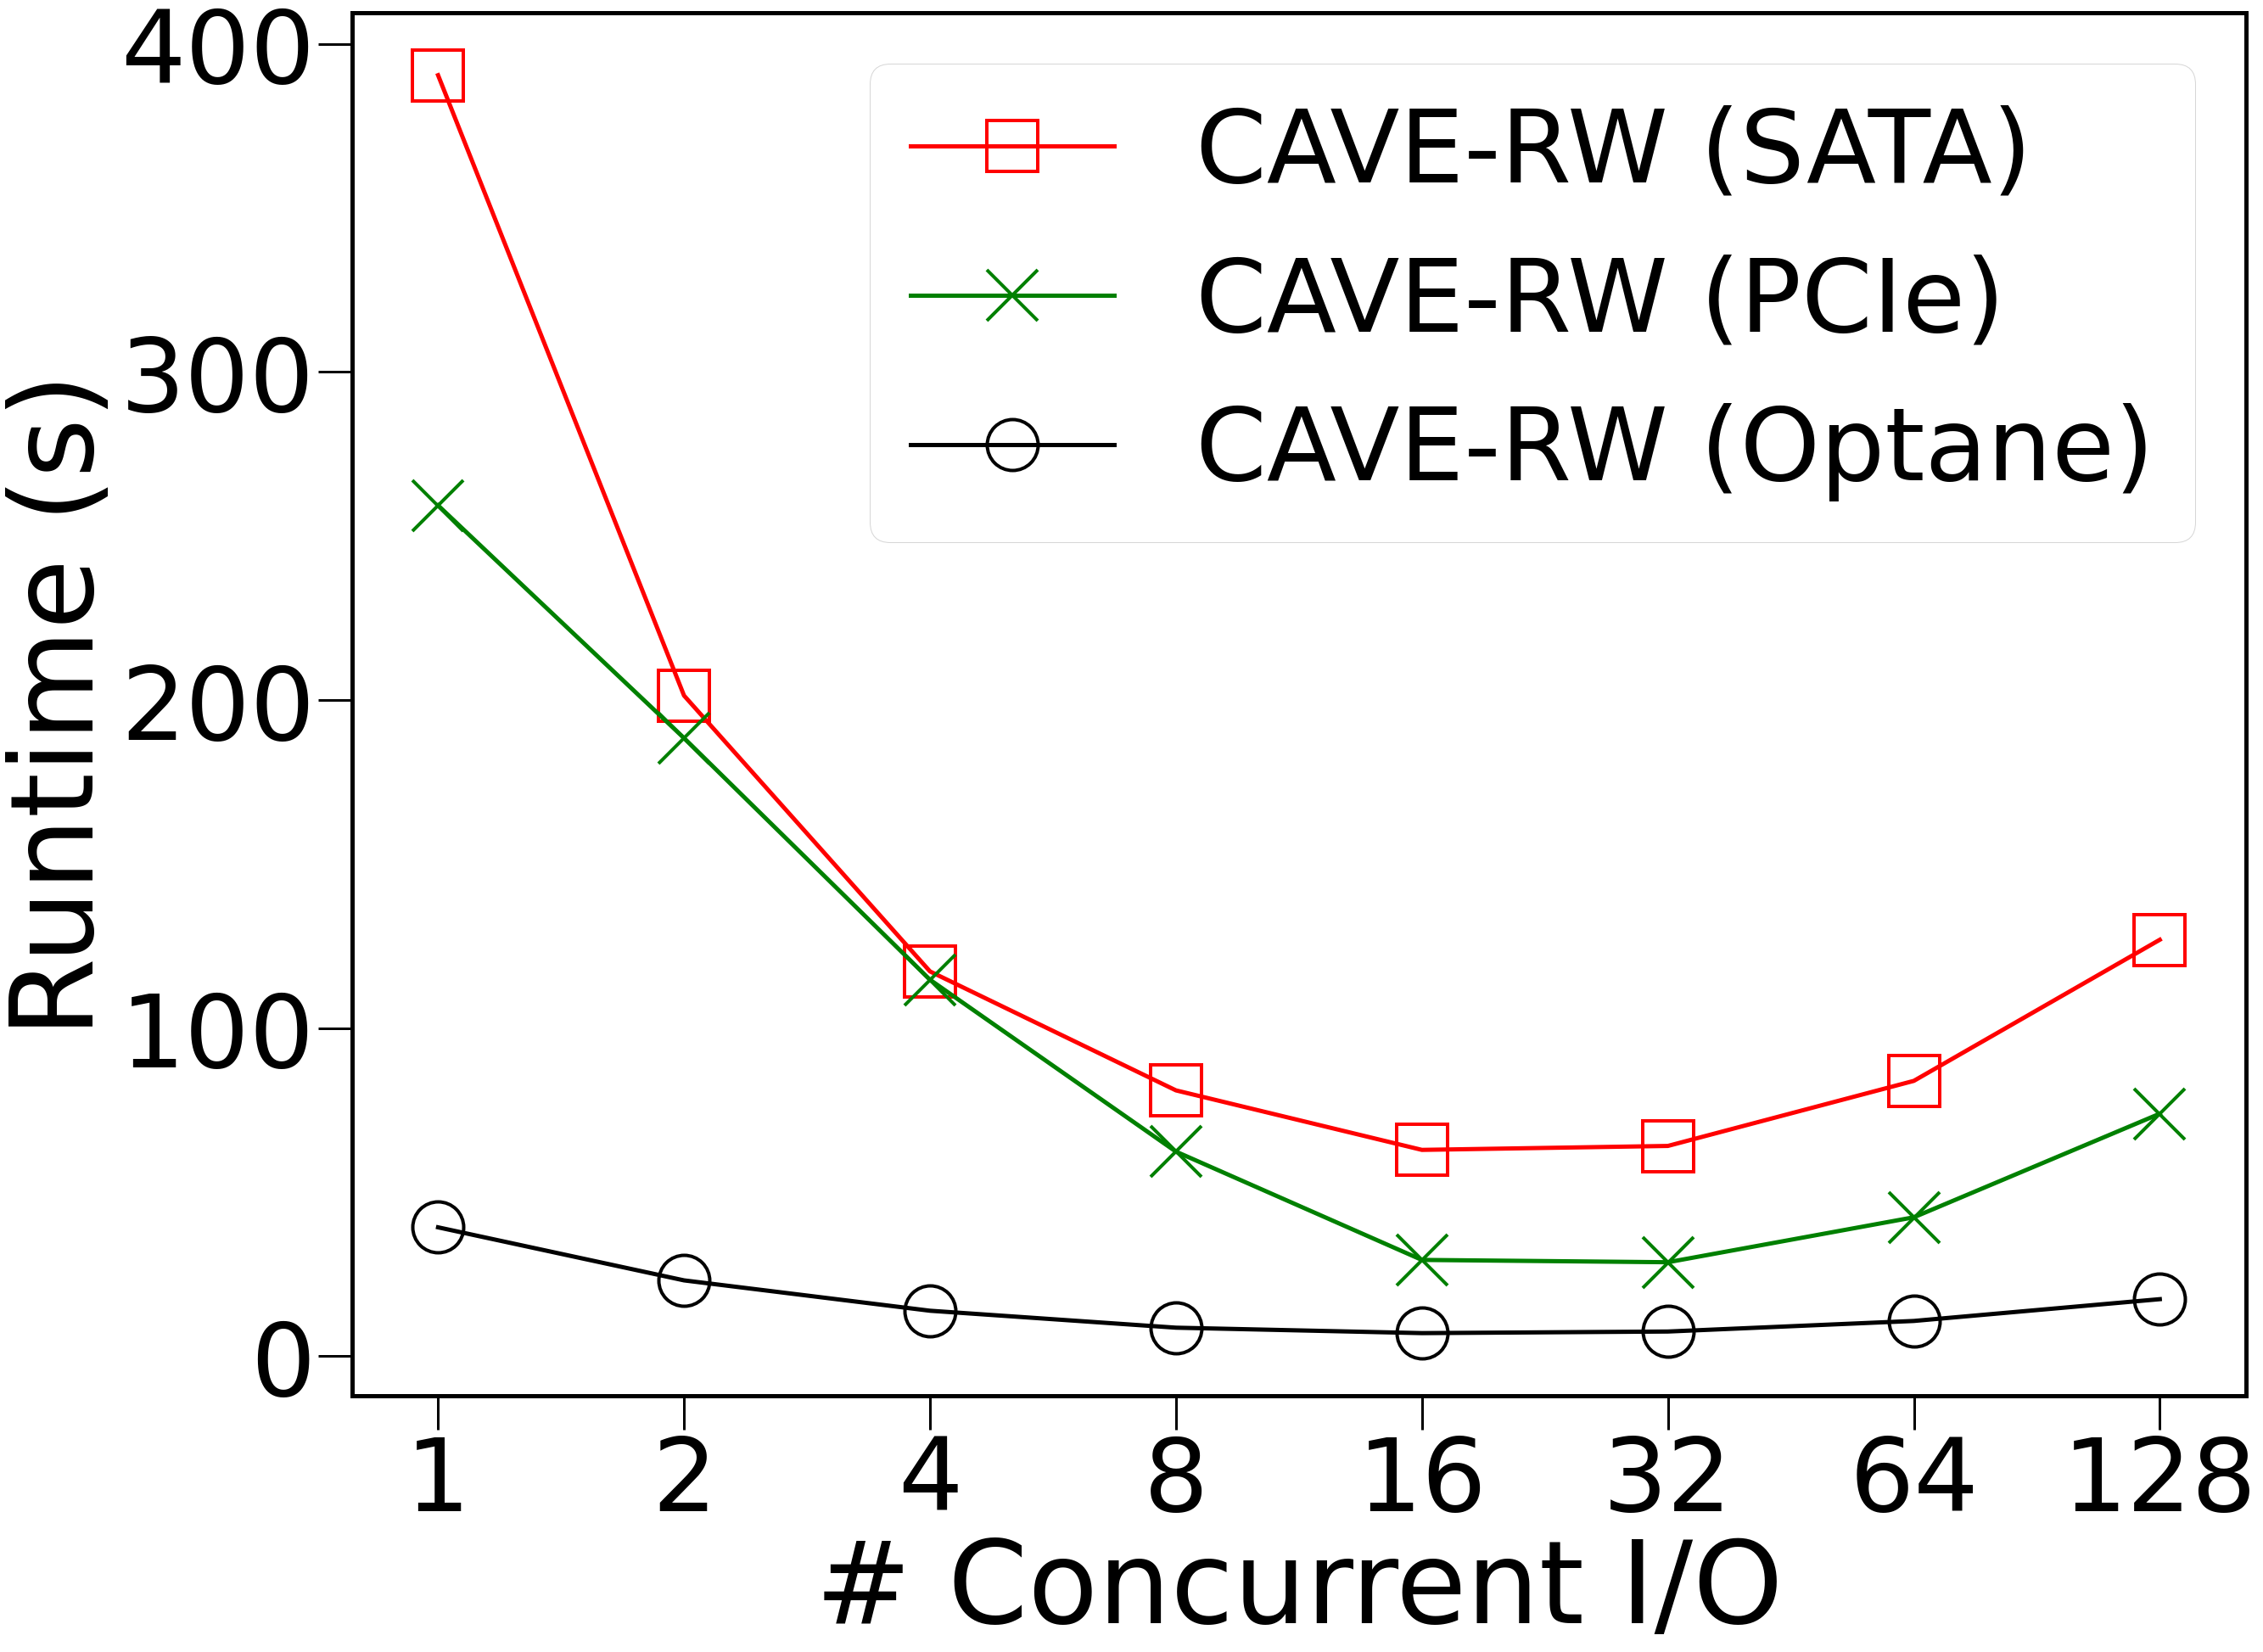

In [12]:
# Graph Settings
fig = plt.figure(figsize=(40,30))
# plt.title(title,fontsize=52)

# ax = fig.add_axes((0, 0, 1, 1))

# for axis in ['top', 'bottom', 'left', 'right']:
#     ax.spines[axis].set_linewidth(5)  # change width

x_label = "# Concurrent I/O"
y_label = "Runtime (s)"
    
plt.xlabel(x_label,fontsize=135)
plt.ylabel(y_label,fontsize=135)

plt.rc('xtick', labelsize = 120)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 120)    # fontsize of the tick labels
plt.rc('legend', fontsize = 120)    # legend fontsize
plt.rc('lines', linewidth = 5)     # line width
plt.rc('lines', markersize = 60)   # marker size
plt.rc('lines', markeredgewidth = 4)   # marker edge width
plt.rc('lines', markerfacecolor = 'none') 

plt.rcParams["axes.linewidth"] = 5    #Border width

plt.xticks(x,thread)
# plt.xticks(x,num_fsize)
# plt.yscale('log')
plt.tick_params(direction='out', length=40, width=3)    # Change tick size

# Plot lines
plt.plot(x, y3, marker='s', color='red', label=y3_name)
plt.plot(x, y1, marker='x', color='green', label=y1_name)
plt.plot(x, y2, marker='o', color='black', label=y2_name)




plt.legend()


plt.savefig(output_path +'.pdf', bbox_inches = "tight")

# If output front is small, rerun this cell